In [1]:
using Judyp, VegaLite, Distributions, Query, Statistics

## Problem 1

In [2]:
include("problem1.jl")

getproblem1 (generic function with 2 methods)

In [3]:
p1 = getproblem1()

Dynamic programming problem with
  2 state variables
    State 1: 10 nodes over [1.0, 100.0]
    State 2: 10 nodes over [1.0, 100.0]
  2 choice variables
    Choice 1: bounds [0.0, 1.0] with initial value 0.5
    Choice 2: bounds [0.0, 1.0] with initial value 0.5
  0 constraints
  0 uncertain parameters


In [4]:
res1 = solve(p1)

Function iteration converged after 369 iterations with max. coefficient difference of 0.0009895815557072751


Dynamic programming solution

In [5]:
simres1 = simulate(res1, 50, 0);

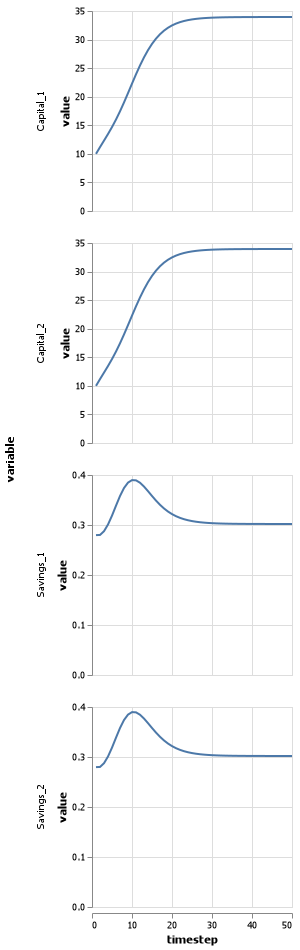

In [6]:
get_table(simres1) |> @vlplot(:line, x=:timestep, y=:value, row="variable:n", resolve={scale={y=:independent}})

## Problem 2

In [7]:
include("problem2.jl")

getproblem2 (generic function with 2 methods)

In [8]:
p2 = getproblem2()

Dynamic programming problem with
  2 state variables
    State 1: 10 nodes over [1.0, 100.0]
    State 2: 10 nodes over [1.0, 100.0]
  4 choice variables
    Choice 1: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 2: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 3: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 4: bounds [0.0, 1.0e11] with initial value 0.1
  2 constraints
    Constraint 1: bounds [0.0, Inf] 
    Constraint 2: bounds [0.0, Inf] 
  0 uncertain parameters


In [9]:
res2 = solve(p2)

Function iteration converged after 369 iterations with max. coefficient difference of 0.0009895815916358686


Dynamic programming solution

In [10]:
res2.diagnostics

Judyp.JudypDiagnostics(0)

In [11]:
## Note: modified use of res.policyfun
init_guess = [1., 1., 1., 1.]
res2.policyfun(simres1.state_vars[:, 20, 1], init_guess)[2] 

3.5694475318724406

In [12]:
simres2 = simulate(res2, 50, 0);

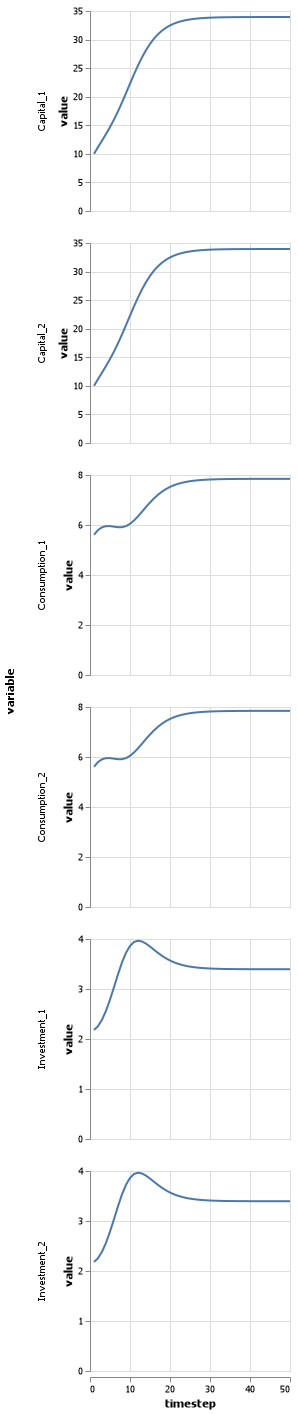

In [13]:
get_table(simres2) |> @vlplot(:line, x=:timestep, y=:value, row="variable:n", resolve={scale={y=:independent}})

## Problem 3

- Deterministic NGM with energy as third production factor
- energy is produced using labor, with one unit of energy costing 1/ρ units of labor


In [14]:
include("problem3.jl")

getproblem3 (generic function with 1 method)

In [15]:
p3 = getproblem3()

Dynamic programming problem with
  1 state variables
    State 1: 10 nodes over [0.7, 1.3]
  4 choice variables
    Choice 1: bounds [0.0, 1.0e11] with initial value 1.0
    Choice 2: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 3: bounds [0.0, 1.0e11] with initial value 0.5
    Choice 4: bounds [0.0, 1.0e11] with initial value 0.1
  1 constraints
    Constraint 1: bounds [0.0, Inf] 
  0 uncertain parameters


In [16]:
res3 = solve(p3)

Function iteration converged after 73 iterations with max. coefficient difference of 0.0009911697571318712


Dynamic programming solution

In [17]:
simres3 = simulate(res3, 50, 0);

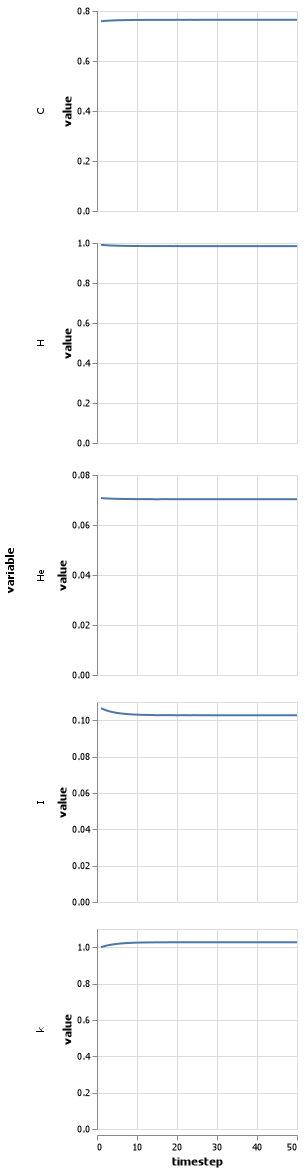

In [18]:
get_table(simres3) |> @vlplot(:line, x=:timestep, y=:value, row="variable:n", resolve={scale={y=:independent}})

## Problem 4

In [19]:
include("problem4.jl")

getproblem4 (generic function with 1 method)

In [20]:
p4 = getproblem4()

Dynamic programming problem with
  2 state variables
    State 1: 10 nodes over [0.7, 1.3]
    State 2: 10 nodes over [0.8853, 1.1295]
  3 choice variables
    Choice 1: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 2: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 3: bounds [0.0, 1.0e11] with initial value 0.1
  1 constraints
    Constraint 1: bounds [0.0, Inf] 
  1 uncertain parameters


In [21]:
res4 = solve(p4)

Function iteration converged after 33 iterations with max. coefficient difference of 0.0008998420038919264


Dynamic programming solution

In [22]:
simres4 = simulate(res4, 50, 100)

Judyp simulation result for 100 Monte Carlo runs and 50 time periods.

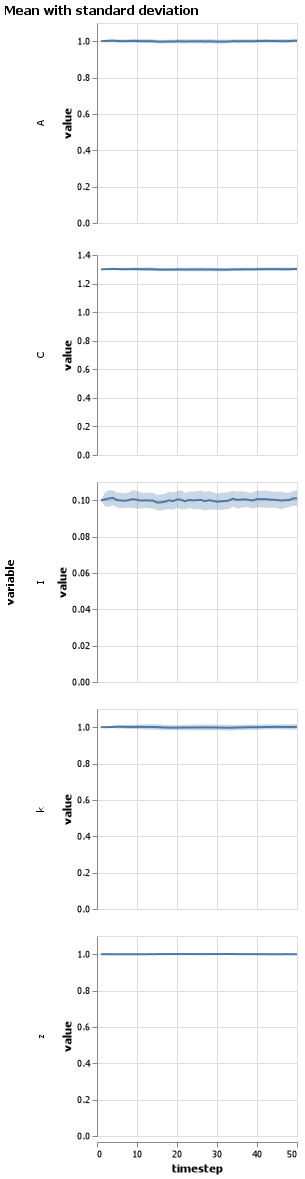

In [23]:
get_table(simres4) |> 
@vlplot(facet={row={field="variable", type="nominal"}}, resolve={scale={y=:independent}}, title="Mean with standard deviation") +
(
    @vlplot(x=:timestep) + 
    @vlplot(:line, y="mean(value)") + 
    @vlplot({:errorband, extent=:stdev}, y=:value)
)

## Problem 5

- NGM with two capital stocks, denoted by k and q 
- investment decisions in k and q are made one period in advance
- Cobb-Douglas production function with labor and a CES composite of k and q, with EoS given by σ

In [24]:
include("problem5.jl")

getproblem5 (generic function with 1 method)

In [25]:
p5 = getproblem5()

Dynamic programming problem with
  2 state variables
    State 1: 10 nodes over [0.3, 0.8]
    State 2: 10 nodes over [0.3, 0.8]
  4 choice variables
    Choice 1: bounds [0.0, 1.0e11] with initial value 0.5
    Choice 2: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 3: bounds [0.0, 1.0e11] with initial value 0.1
    Choice 4: bounds [0.0, 1.0e11] with initial value 1.0
  1 constraints
    Constraint 1: bounds [0.0, Inf] 
  0 uncertain parameters


In [26]:
res5 = solve(p5)

Function iteration converged after 73 iterations with max. coefficient difference of 0.0009774996508049583


Dynamic programming solution

In [27]:
simres5 = simulate(res5, 50, 0);

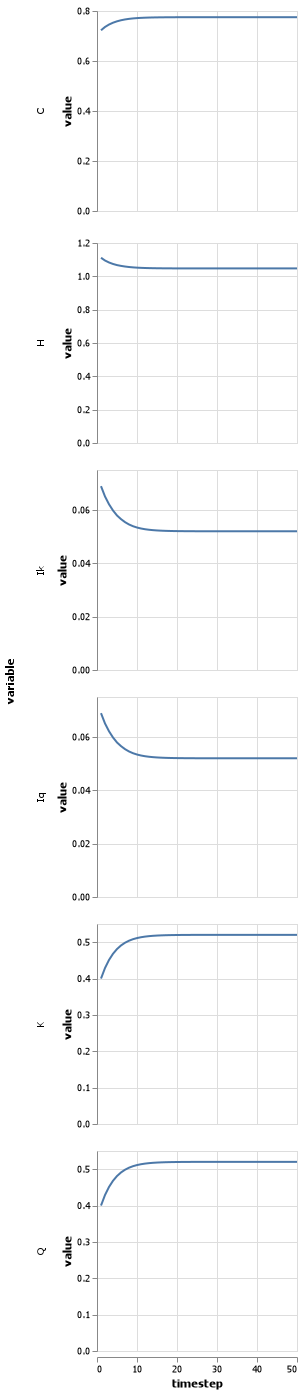

In [28]:
get_table(simres5) |> @vlplot(:line, x=:timestep, y=:value, row="variable:n", resolve={scale={y=:independent}})